Sky Kapoor and Chris Compierchio

This program will calculate the electric and magnetic field patterns excited within a cavity by a current pattern.

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as c
plt.rcParams.update({'font.size': 16})
import dcst
from numpy.fft import rfft,irfft
import scipy

In [2]:
######################################################################
#
# Functions to perform fast discrete cosine and sine transforms and
# their inverses in one and two dimensions.  These functions work by
# wrapping the DFT function from numpy, rather than explicitly
# performing the cosine and sine transforms themselves.  The sine
# transforms take arrays whose first element is zero and return arrays
# whose first element is also zero.  This differs from some other
# implementations, which drop the first element, since it is always
# zero.
#
#   dct(y): Type-II discrete cosine transform (DCT) of real data y
#   idct(a): Type-II inverse DCT of a
#   dct2(y): 2D DCT of 2D real array y
#   idct2(a): 2D inverse DCT real array a
#   dst(y): Type-I discrete sine transform (DST) of real data y
#   idst(a): Type-I inverse DST of a
#   dst2(y): 2D DST of 2D real array y
#   idst2(a): 2D inverse DST real array a
#
# Written by Mark Newman <mejn@umich.edu>, June 24, 2011
# You may use, share, or modify this file freely
#
######################################################################


from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft


######################################################################
# 1D DCT Type-II

def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])


######################################################################
# 1D inverse DCT Type-II

def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]


######################################################################
# 2D DCT

def dct2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dct(y[i,:])
    for j in range(N):
        b[:,j] = dct(a[:,j])

    return b


######################################################################
# 2D inverse DCT

def idct2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idct(b[i,:])
    for j in range(N):
        y[:,j] = idct(a[:,j])

    return y


######################################################################
# 1D DST Type-I

def dst(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y


######################################################################
# 2D DST

def dst2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dst(y[i,:])
    for j in range(N):
        b[:,j] = dst(a[:,j])

    return b


######################################################################
# 2D inverse DST

def idst2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idst(b[i,:])
    for j in range(N):
        y[:,j] = idst(a[:,j])

    return y



######################################################################
#
# Functions to perform fast discrete cosine and sine transforms and
# their inverses in one dimensions.  These functions work by
# wrapping the DFT function from numpy, rather than explicitly
# performing the cosine and sine transforms themselves.  The sine
# transforms take arrays whose first element is zero and return arrays
# whose first element is also zero.  This differs from some other
# implementations, which drop the first element, since it is always
# zero.
#
#   dct(y): Type-II discrete cosine transform (DCT) of real data y
#   idct(a): Type-II inverse DCT of a
#   dst(y): Type-I discrete sine transform (DST) of real data y
#   idst(a): Type-I inverse DST of a
#
# Originally written by Mark Newman <mejn@umich.edu>, June 24, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import arange,exp,real,imag,pi,zeros,complex_
from numpy.fft import rfft,irfft

######################################################################
# 1D DCT Type-II

def dct(y):
    # Type-II discrete cosine transform (DCT) of real data y
    N = len(y)
    y2 = zeros(2*N)
    y2[:N] = y[:]
    y2[N:] = y[::-1]
    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])

######################################################################
# 1D DST Type-I

def dst(y):
    # Type-I discrete sine transform (DST) of real data y
    N = len(y)
    y2 = zeros(2*N)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0
    return a

######################################################################
# 1D inverse DCT Type-II    
    
def idct(a):
    # Type-II inverse DCT of a
    N = len(a)
    c = zeros(N+1,dtype=complex_)
    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]
    
######################################################################
# 1D inverse DST Type-I

def idst(a):
    # Type-I inverse DST of a
    N = len(a)
    c = zeros(N+1,dtype=complex_)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0
    return y


PART A

In [3]:
def dCCt2(f):
    """ Takes DCT along x, then DCT along y (X = C/S)
    IN: f, the input 2D numpy array
    OUT: b, the 2D transformed array """
    M = f.shape[0] # Number of rows
    N = f.shape[1] # Number of columns
    a = np.zeros((M, N)) # Intermediate array
    b = np.zeros((M, N)) # Final array
    # Take transform along x
    for j in range(N):
        # DCT f[:, j] and set as a[:, j]
        a[:,j] = dct(f[:,j])
    # Take transform along y
    for i in range(M):
        # DST a[i, :] and set as b[i, :]
        a[i,:] = dct(f[i,:])
    return b

def idCCt2(b):
    """ Takes iDCT along y, then iDCT along x (X = C/S)
    IN: b, the input 2D numpy array
    OUT: f, the 2D inverse-transformed array """
    M = b.shape[0] # Number of rows
    N = b.shape[1] # Number of columns
    a = np.zeros((M, N)) # Intermediate array
    b = np.zeros((M, N)) # Final array
    # Take inverse transform along y
    for i in range(M):
        # iDCT b[i,:] and set as a[i,:]
        a[i,:] = idct(b[i,:])
    # Take inverse transform along x
    for j in range(N):
        # iDST a[:,j] and set as f[:,j]
        a[i,:] = idct(b[i,:])
    return a

def dSSt2(f):
    """ Takes DST along x, then DST along y (X = C/S)
    IN: f, the input 2D numpy array
    OUT: b, the 2D transformed array """
    M = f.shape[0] # Number of rows
    N = f.shape[1] # Number of columns
    a = np.zeros((M, N)) # Intermediate array
    b = np.zeros((M, N)) # Final array
    # Take transform along x
    for j in range(N):
        # DST f[:, j] and set as a[:, j]
        a[:,j] = dst(f[:,j])
    # Take transform along y
    for i in range(M):
        # DST a[i, :] and set as b[i, :]
        a[i,:] = dst(f[i,:])
    return b

def idSSt2(b):
    """ Takes iDST along y, then iDST along x (X = C/S)
    IN: b, the input 2D numpy array
    OUT: f, the 2D inverse-transformed array """
    M = b.shape[0] # Number of rows
    N = b.shape[1] # Number of columns
    a = np.zeros((M, N)) # Intermediate array
    b = np.zeros((M, N)) # Final array
    # Take inverse transform along y
    for i in range(M):
        # iDST b[i,:] and set as a[i,:]
        a[i,:] = idst(b[i,:])
    # Take inverse transform along x
    for j in range(N):
        # iDST a[:,j] and set as f[:,j]
        a[i,:] = idst(b[i,:])
    return a

def dCSt2(f):
    """ Takes DCT along y, then DST along x (X = C/S)
    IN: f, the input 2D numpy array
    OUT: b, the 2D inverse-transformed array """
    M = f.shape[0] # Number of rows
    N = f.shape[1] # Number of columns
    a = np.zeros((M, N)) # Intermediate array
    b = np.zeros((M, N)) # Final array
    # Take transform along x
    for j in range(N):
        # DCT f[:,j] and set as a[:,j]
        a[:,j] = dct(f[:,j])
    # Take transform along y
    for i in range(M):
        # DST a[:,j] and set as b[:,j]
        b[i,:] = dst(a[i,:])

    return b

def idCSt2(b):
    """ Takes iDCT along y, then iDST along x (X = C/S)
    IN: b, the input 2D numpy array
    OUT: f, the 2D inverse-transformed array """
    M = b.shape[0] # Number of rows
    N = b.shape[1] # Number of columns
    a = np.zeros((M, N)) # Intermediate array
    f = np.zeros((M, N)) # Final array
    # Take inverse transform along y
    for i in range(M):
        # iDCT b[i,:] and set as a[i,:]
        a[i,:] = idct(b[i,:])
    # Take inverse transform along x
    for j in range(N):
        # iDST a[:,j] and set as f[:,j]
        f[:,j] = idst(a[:,j])

    return f

def dSCt2(f):
    """ Takes DST along y, then DCT along x (X = C/S)
    IN: f, the input 2D numpy array
    OUT: b, the 2D inverse-transformed array """
    M = f.shape[0] # Number of rows
    N = f.shape[1] # Number of columns
    a = np.zeros((M, N)) # Intermediate array
    b = np.zeros((M, N)) # Final array
    # Take transform along x
    for j in range(N):
        # DST f[:,i] and set as a[:,i]
        a[:,j] = dst(f[:,j])
    # Take transform along y
    for i in range(M):
        # DCT a[j,:] and set as b[j,:]
        b[i,:] = dct(a[i,:])

    return b

def idSCt2(b):
    """ Takes iDST along y, then iDCT along x (X = C/S)
    IN: b, the input 2D numpy array
    OUT: f, the 2D inverse-transformed array """
    M = b.shape[0] # Number of rows
    N = b.shape[1] # Number of columns
    a = np.zeros((M, N)) # Intermediate array
    f = np.zeros((M, N)) # Final array
    # Take inverse transform along y
    for i in range(M):
        # iDST b[i,:] and set as a[i,:]
        a[i,:] = idst(b[i,:])
    # Take inverse transform along x
    for j in range(N):
        # iDCT a[:,j] and set as f[:,j]
        f[:,j] = idct(a[:,j])

    return f

F = np.array([[0,3,3],[0,3,3],[0,3,1]])
F_fft = dCSt2(F)
F_ifft = idSCt2(F_fft)
F_ifft

array([[0., 3., 3.],
       [0., 3., 3.],
       [0., 3., 1.]])

PART B

In [20]:
#define constants
T = 20
tau = 0.01
Lx = Ly = J0 = m = n = c = 1
P = 32
omega = 3.75
N = int(T/tau)
t = n*tau
x = y = np.arange(1, P+1, 1)**2
xs, ys = np.meshgrid(x,y)
time = np.arange(0, T, tau)

#Define necessary arrays
Hx = np.zeros((P, P))
Hy = np.zeros((P, P))
Hxs = []
Hys = []
Es = []
E = np.zeros((P, P))
E2 = np.zeros((P, P))
X2 = np.zeros((P, P))
Y2 = np.zeros((P, P))
J = np.zeros((P, P))
Jz = np.zeros((P, P))

#Caluclate Dx and Dy given in the lab handout
Dx = np.pi*c*tau / (2*Lx)
Dy = np.pi*c*tau / (2*Ly)

#loop over time
for i in time:
    
    #calculate Jz
    Jz = J0*np.sin(m*np.pi*xs/Lx)*np.sin(n*np.pi*ys/Ly)*np.sin(omega*t)
    
    #Foruier transform Hx, Hy, E, and Jz
    X = dSCt2(Hx)
    Y = dCSt2(Hy)
    E3 = dst2(E)
    J2 = dst2(Jz)
    
    #loop through p and q to caluclate the energy and Hamiltonians
    for q in range(P):
        for p in range(P):
            E2[q][p] = ((1-(p**2)*(Dx**2)-(q**2)*(Dy**2))*E3[q][p]+(2*q*Dy*X[q][p])+(2*p*Dx*Y[q][p])+tau*J2[q][p])/(1+(p**2)*(Dx**2)+(q**2)*(Dy**2))
            X2[q][p] = X[q][p] - q*Dy*(E2[q][p]+E3[q][p])
            Y2[q][p] = Y[q][p] - p*Dx*(E2[q][p]+E3[q][p])

    #inverse fourier tranform the hamiltonians and energy. Store them
    Hx = idSCt2(X2)
    Hy = idCSt2(Y2)
    E = idst2(E2)
    
    Hxs.append(Hx[0][16])
    Hys.append(Hy[16][0])
    Es.append(E[16][16])
    
    


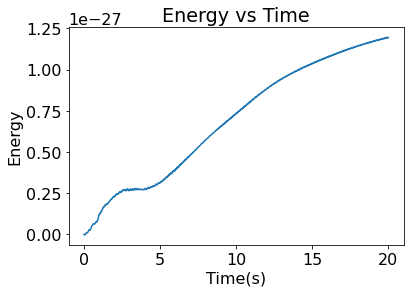

In [21]:
#Plot Energy  
plt.plot(time, Es)
plt.title("Energy vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Energy")
plt.show()

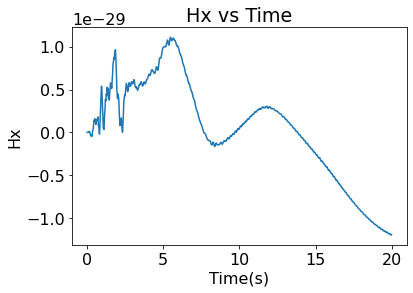

In [22]:
#Plot Hx  
plt.plot(time, Hxs)
plt.title("Hx vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Hx")
plt.show()

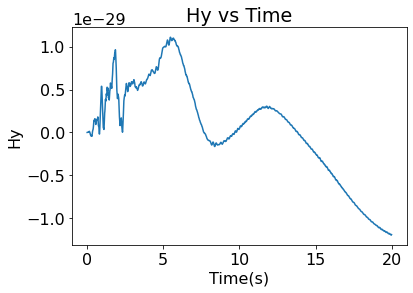

In [23]:
#Plot Hy 
plt.plot(time, Hys)
plt.title("Hy vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Hy")
plt.show()